In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

engine = "h5netcdf"

file = r"C:\Users\david\PythonProjekte\physicsnemoKIDS\examples\weather\ProjektModelle\David\Data\hrrr_mini\hrrr_mini_train.nc"
ds = xr.open_dataset(file, engine = engine)

print(ds)     
print(ds.coord)         

c:\Users\david\anaconda3\envs\Rainscale\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


<xarray.Dataset> Size: 1MB
Dimensions:  (sample: 100000, coord: 2)
Coordinates:
    coord    (sample, coord) uint16 400kB ...
Dimensions without coordinates: sample
Data variables:
    time     (sample) datetime64[ns] 800kB ...
<xarray.DataArray 'coord' (sample: 100000, coord: 2)> Size: 400kB
[200000 values with dtype=uint16]
Coordinates:
    coord    (sample, coord) uint16 400kB ...
Dimensions without coordinates: sample


In [6]:
print("\n--- GROUPS ---")
try:
    import h5netcdf
    with h5netcdf.File(file, 'r') as f:
        print("Available groups:", list(f.keys()))
        
        for group_name in f.keys():
            if group_name != '/':          
                print(f"\nGroup: {group_name}")
                
                group_ds = xr.open_dataset(file, group=group_name)
                print(group_ds)
                group_ds.close()
except Exception as e:
    print(f"No groups or error accessing groups: {e}")

ds.close()


--- GROUPS ---
Available groups: ['input', 'output', 'invariant', 'time', 'coord']

Group: input
<xarray.Dataset> Size: 666MB
Dimensions:  (sample: 100000, y_lr: 8, x_lr: 8)
Dimensions without coordinates: sample, y_lr, x_lr
Data variables: (12/26)
    u10m     (sample, y_lr, x_lr) float32 26MB ...
    v10m     (sample, y_lr, x_lr) float32 26MB ...
    t2m      (sample, y_lr, x_lr) float32 26MB ...
    tcwv     (sample, y_lr, x_lr) float32 26MB ...
    sp       (sample, y_lr, x_lr) float32 26MB ...
    msl      (sample, y_lr, x_lr) float32 26MB ...
    ...       ...
    t500     (sample, y_lr, x_lr) float32 26MB ...
    t250     (sample, y_lr, x_lr) float32 26MB ...
    q1000    (sample, y_lr, x_lr) float32 26MB ...
    q850     (sample, y_lr, x_lr) float32 26MB ...
    q500     (sample, y_lr, x_lr) float32 26MB ...
    q250     (sample, y_lr, x_lr) float32 26MB ...

Group: output
<xarray.Dataset> Size: 7GB
Dimensions:  (sample: 100000, y_hr: 64, x_hr: 64)
Dimensions without coordinat

In [7]:
input_ds = xr.open_dataset(file, group= "input", engine=engine)
print(input_ds)

<xarray.Dataset> Size: 666MB
Dimensions:  (sample: 100000, y_lr: 8, x_lr: 8)
Dimensions without coordinates: sample, y_lr, x_lr
Data variables: (12/26)
    u10m     (sample, y_lr, x_lr) float32 26MB ...
    v10m     (sample, y_lr, x_lr) float32 26MB ...
    t2m      (sample, y_lr, x_lr) float32 26MB ...
    tcwv     (sample, y_lr, x_lr) float32 26MB ...
    sp       (sample, y_lr, x_lr) float32 26MB ...
    msl      (sample, y_lr, x_lr) float32 26MB ...
    ...       ...
    t500     (sample, y_lr, x_lr) float32 26MB ...
    t250     (sample, y_lr, x_lr) float32 26MB ...
    q1000    (sample, y_lr, x_lr) float32 26MB ...
    q850     (sample, y_lr, x_lr) float32 26MB ...
    q500     (sample, y_lr, x_lr) float32 26MB ...
    q250     (sample, y_lr, x_lr) float32 26MB ...


In [8]:
output_ds = xr.open_dataset(file, group="output", engine=engine)
print(output_ds)

<xarray.Dataset> Size: 7GB
Dimensions:  (sample: 100000, y_hr: 64, x_hr: 64)
Dimensions without coordinates: sample, y_hr, x_hr
Data variables:
    2t       (sample, y_hr, x_hr) float32 2GB ...
    10u      (sample, y_hr, x_hr) float32 2GB ...
    10v      (sample, y_hr, x_hr) float32 2GB ...
    tp       (sample, y_hr, x_hr) float32 2GB ...


In [9]:
invariant_ds = xr.open_dataset(file, group="invariant", engine=engine)
print(invariant_ds)

<xarray.Dataset> Size: 30MB
Dimensions:    (y_grid: 1059, x_grid: 1799)
Dimensions without coordinates: y_grid, x_grid
Data variables:
    latitude   (y_grid, x_grid) float32 8MB ...
    longitude  (y_grid, x_grid) float32 8MB ...
    elev_mean  (y_grid, x_grid) float32 8MB ...
    lsm_mean   (y_grid, x_grid) float32 8MB ...


In [10]:
time = ds["time"]
coord = ds["coord"]

print(time)
print(coord)

<xarray.DataArray 'time' (sample: 100000)> Size: 800kB
[100000 values with dtype=datetime64[ns]]
Dimensions without coordinates: sample
<xarray.DataArray 'coord' (sample: 100000, coord: 2)> Size: 400kB
[200000 values with dtype=uint16]
Coordinates:
    coord    (sample, coord) uint16 400kB ...
Dimensions without coordinates: sample


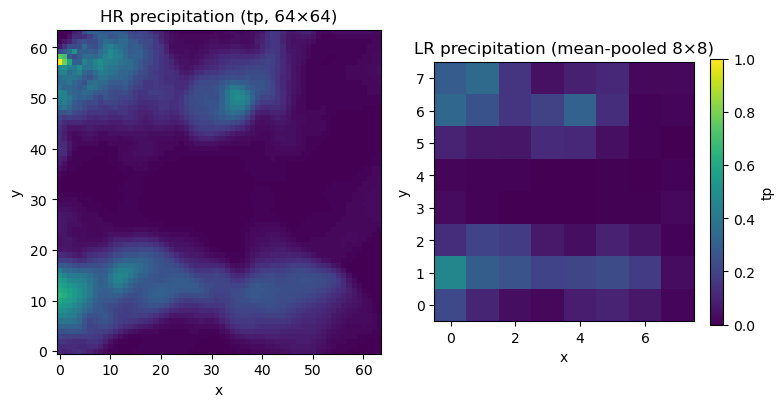

In [16]:
sample_idx = 1003
tp_hr = output_ds["tp"].isel(sample=sample_idx).values
tp_hr = np.clip(tp_hr, 0, None)

H, W = tp_hr.shape  
factor_y = H // 8
factor_x = W // 8


tp_lr = tp_hr.reshape(8, factor_y, 8, factor_x).mean(axis=(1, 3))

vmin = tp_hr.min()
vmax = tp_hr.max()

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

im0 = axes[0].imshow(tp_hr, origin="lower", cmap="viridis", vmin=vmin, vmax=vmax)
axes[0].set_title("HR precipitation (tp, 64×64)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

im1 = axes[1].imshow(tp_lr, origin="lower", cmap="viridis", vmin=vmin, vmax=vmax)
axes[1].set_title("LR precipitation (mean-pooled 8×8)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")

y0_hr, x0_hr = 10, 10
h_hr, w_hr = 30, 30


y0_lr, x0_lr = y0_hr / factor_y, x0_hr / factor_x
h_lr, w_lr = h_hr / factor_y, w_hr / factor_x



cbar = fig.colorbar(im0, ax=axes[1], shrink=0.8)
cbar.set_label("tp")

plt.tight_layout()
plt.show()

Neue Insights

In [3]:
input_ds  = xr.open_dataset(file, group="input", engine=engine)
output_ds = xr.open_dataset(file, group="output", engine=engine)

print("INPUT VARS:", list(input_ds.data_vars))
print("OUTPUT VARS:", list(output_ds.data_vars))

print("\nINPUT:", input_ds)
print("\nOUTPUT:", output_ds)

INPUT VARS: ['u10m', 'v10m', 't2m', 'tcwv', 'sp', 'msl', 'u1000', 'u850', 'u500', 'u250', 'v1000', 'v850', 'v500', 'v250', 'z1000', 'z850', 'z500', 'z250', 't1000', 't850', 't500', 't250', 'q1000', 'q850', 'q500', 'q250']
OUTPUT VARS: ['2t', '10u', '10v', 'tp']

INPUT: <xarray.Dataset> Size: 666MB
Dimensions:  (sample: 100000, y_lr: 8, x_lr: 8)
Dimensions without coordinates: sample, y_lr, x_lr
Data variables: (12/26)
    u10m     (sample, y_lr, x_lr) float32 26MB ...
    v10m     (sample, y_lr, x_lr) float32 26MB ...
    t2m      (sample, y_lr, x_lr) float32 26MB ...
    tcwv     (sample, y_lr, x_lr) float32 26MB ...
    sp       (sample, y_lr, x_lr) float32 26MB ...
    msl      (sample, y_lr, x_lr) float32 26MB ...
    ...       ...
    t500     (sample, y_lr, x_lr) float32 26MB ...
    t250     (sample, y_lr, x_lr) float32 26MB ...
    q1000    (sample, y_lr, x_lr) float32 26MB ...
    q850     (sample, y_lr, x_lr) float32 26MB ...
    q500     (sample, y_lr, x_lr) float32 26MB ...

In [4]:
import numpy as np

def quick_stats(ds, n=26):
    for name in list(ds.data_vars)[:n]:
        a = ds[name].isel(sample=slice(0, 200)).values  # small slice
        print(
            f"{name:10s} shape={a.shape} dtype={a.dtype} "
            f"nan%={np.isnan(a).mean()*100:.3f} "
            f"min={np.nanmin(a):.4g} max={np.nanmax(a):.4g} mean={np.nanmean(a):.4g}"
        )

print("=== INPUT quick stats ===")
quick_stats(input_ds)

print("\n=== OUTPUT quick stats ===")
quick_stats(output_ds, n=10)


=== INPUT quick stats ===
u10m       shape=(200, 8, 8) dtype=float32 nan%=0.000 min=-8.052 max=7.59 mean=0.1917
v10m       shape=(200, 8, 8) dtype=float32 nan%=0.000 min=-11.27 max=9.132 mean=0.3389
t2m        shape=(200, 8, 8) dtype=float32 nan%=0.000 min=278.3 max=315.1 mean=295.6
tcwv       shape=(200, 8, 8) dtype=float32 nan%=0.000 min=6.609 max=61.15 mean=30.15
sp         shape=(200, 8, 8) dtype=float32 nan%=0.000 min=6.891e+04 max=1.025e+05 mean=9.699e+04
msl        shape=(200, 8, 8) dtype=float32 nan%=0.000 min=1.005e+05 max=1.025e+05 mean=1.016e+05
u1000      shape=(200, 8, 8) dtype=float32 nan%=0.000 min=-9.117 max=12.72 mean=0.2579
u850       shape=(200, 8, 8) dtype=float32 nan%=0.000 min=-10.18 max=15.37 mean=1.014
u500       shape=(200, 8, 8) dtype=float32 nan%=0.000 min=-15.96 max=22.88 mean=4.177
u250       shape=(200, 8, 8) dtype=float32 nan%=0.000 min=-27.67 max=50.62 mean=9.762
v1000      shape=(200, 8, 8) dtype=float32 nan%=0.000 min=-16.64 max=13.03 mean=0.3546
v850 

In [5]:
ds = xr.open_dataset(file, engine=engine)  # root (for coord/time/invariant pointers)
coord = ds["coord"].values
time  = ds["time"].values

print("coord shape:", coord.shape, coord.dtype)
print("coord min:", coord.min(axis=0), "max:", coord.max(axis=0))
print("time[0:3]:", time[:3])

inv = xr.open_dataset(file, group="invariant", engine=engine)
print("invariant dims:", inv.dims)
print("invariant shapes:",
      {k: tuple(inv[k].shape) for k in inv.data_vars})

# sanity check: does coord index into invariant?
y0, x0 = coord[0]
print("first coord:", (y0, x0))
print("lat/lon at first coord:",
      float(inv["latitude"][y0, x0].values),
      float(inv["longitude"][y0, x0].values))


coord shape: (100000, 2) uint16
coord min: [0 0] max: [ 995 1735]
time[0:3]: ['2018-08-01T01:00:00.000000000' '2018-08-01T01:00:00.000000000'
 '2018-08-01T01:00:00.000000000']
invariant dims: FrozenMappingWarningOnValuesAccess({'y_grid': 1059, 'x_grid': 1799})
invariant shapes: {'latitude': (1059, 1799), 'longitude': (1059, 1799), 'elev_mean': (1059, 1799), 'lsm_mean': (1059, 1799)}
first coord: (np.uint16(968), np.uint16(1529))
lat/lon at first coord: 47.94380187988281 -72.17585754394531


LR shape: (8, 8) HR shape: (64, 64) vars: u10m 2t


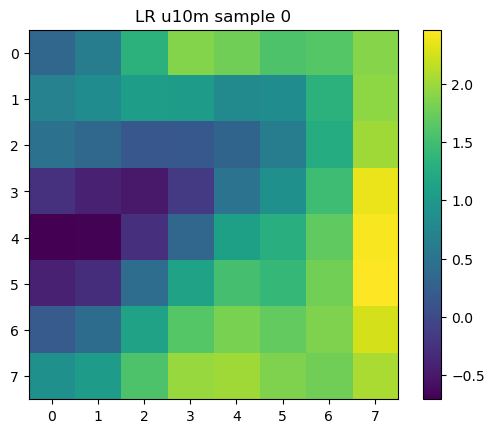

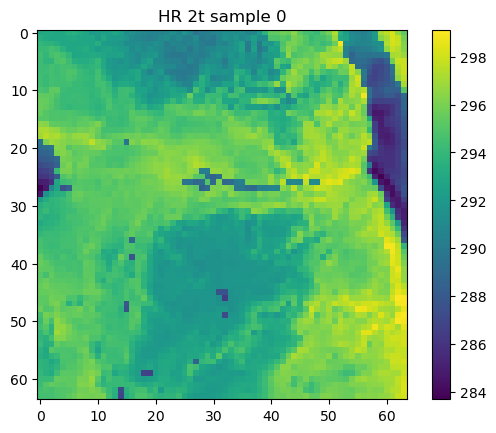

In [6]:
import matplotlib.pyplot as plt

s = 0
in_name  = list(input_ds.data_vars)[0]
out_name = list(output_ds.data_vars)[0]

lr = input_ds[in_name].isel(sample=s).values
hr = output_ds[out_name].isel(sample=s).values

print("LR shape:", lr.shape, "HR shape:", hr.shape, "vars:", in_name, out_name)

plt.figure()
plt.imshow(lr)
plt.title(f"LR {in_name} sample {s}")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(hr)
plt.title(f"HR {out_name} sample {s}")
plt.colorbar()
plt.show()
